<a href="https://colab.research.google.com/github/Jebina-ai/Clustering/blob/main/hierarch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing dataset
from google.colab import files
df = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [43]:
labels = pd.read_csv("Mall_Customers.csv")
labels.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)

labels.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


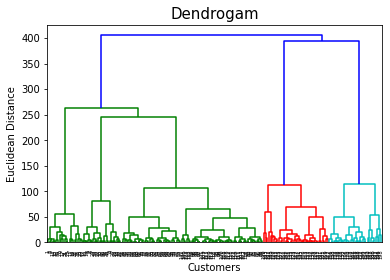

In [5]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) # Ward method tries to minimize the variance within each cluster.
plt.title('Dendrogam', fontsize = 15)                        #minimizing the within-cluster variants.That is the variance within each cluster
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

[691.65460526 665.03524399]


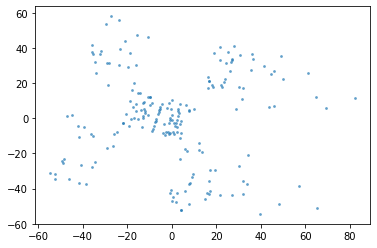

In [20]:
from sklearn.decomposition import PCA
#PCA with two principal components
PCA_2d = PCA(n_components=2).fit(X)
#PCA_2d.head()
print(PCA_2d.explained_variance_)
PCA_2d = PCA(n_components=2).fit_transform(X)
plt.scatter(PCA_2d[:, 0], PCA_2d[:, 1], marker='.', s=30, lw=0, alpha=0.7, edgecolor='k')

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm

for n_clusters in range(2,11):
   
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
        



For n_clusters = 2 The average silhouette_score is : 0.36706444723912895
For n_clusters = 3 The average silhouette_score is : 0.4618340266628975
For n_clusters = 4 The average silhouette_score is : 0.4916598193892782
For n_clusters = 5 The average silhouette_score is : 0.5529945955148897
For n_clusters = 6 The average silhouette_score is : 0.5380208285578872
For n_clusters = 7 The average silhouette_score is : 0.519904611908887
For n_clusters = 8 The average silhouette_score is : 0.4326286245782246
For n_clusters = 9 The average silhouette_score is : 0.43892545672004507
For n_clusters = 10 The average silhouette_score is : 0.4342656377895271


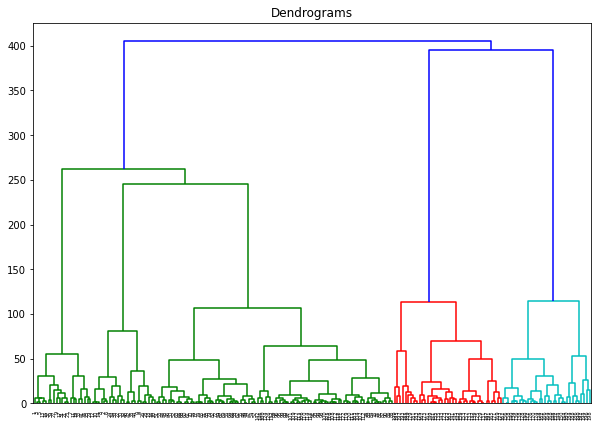

In [35]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))


In [40]:
from sklearn.cluster import AgglomerativeClustering
num_clusters = 5
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)



array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [7]:
y_hc=hc.fit_predict(X)

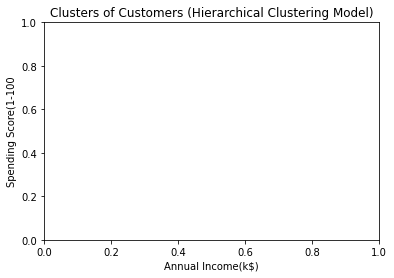

In [41]:
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

In [47]:
from sklearn.cluster import AgglomerativeClustering
num_clusters = 4
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

df["Cluster"] = cluster.labels_
df["Cluster"].value_counts()

0    108
2     39
1     32
3     21
Name: Cluster, dtype: int64

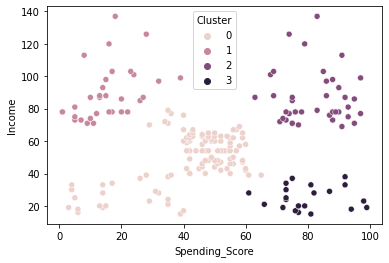

In [51]:
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Cluster',  data=df)